<a href="https://colab.research.google.com/github/ParthMody/RealEstate/blob/main/Real_Estate_Appraisal_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing the libraries

In [2]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 3.0 MB/s eta 0:00:00


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import category_encoders as ce

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Real Estate Appraisals/Dataset/homebazzar_updated.csv').head(1000)

In [5]:
df.head()

,furnishing_status,minCarpetArea,maxCarpetArea,possessionStatus,developerName,propetyBuyOrRent,localityId,sublocalityId,cityId,possessionYear,liveabilityIndexCount,propertyType,bestForInvestmentCount,builder_rating,Bedroom,Hall,Kitchen,prices
0,0,471,2342,Under Construction,Hiranandani Group,buy,474,882,1,2022.0,10.0,appartment,10,5.0,2.5,1,1,1.23 Cr
1,0,304,1707,Ready Possession,Hiranandani Group,buy,35,1457,1,NaN,9.0,appartment,10,5.0,2.5,1,1,47.5 L
2,0,701,1092,Ready Possession,Hiranandani Group,buy,474,882,1,NaN,10.0,appartment,9,5.0,2.5,1,1,1.66 Cr
3,0,1251,1300,Ready Possession,Hiranandani Group,buy,474,882,1,2018.0,9.0,appartment,9,5.0,3.0,1,1,0
4,0,316,413,Under Construction,Hiranandani Group,buy,474,884,1,2024.0,NaN,commercial_office,9,5.0,0.0,0,0,94 L


In [6]:
df.describe()

,furnishing_status,minCarpetArea,maxCarpetArea,localityId,sublocalityId,cityId,possessionYear,liveabilityIndexCount,bestForInvestmentCount,builder_rating,Bedroom,Hall,Kitchen
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,893.000000,882.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.10000,1151.485000,1788.433000,299.933000,1176.882000,1.98300,2021.406495,7.006803,6.974000,4.726500,2.125500,0.883000,0.883000
std,0.30015,2857.111911,3218.482173,251.579472,809.120145,2.49819,4.198740,2.482620,2.458733,0.404489,1.087052,0.321581,0.321581
min,0.00000,0.000000,0.000000,5.000000,6.000000,1.00000,1997.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000
25%,0.00000,446.000000,756.750000,59.000000,580.750000,1.00000,2019.000000,4.000000,4.000000,4.500000,1.500000,1.000000,1.000000
50%,0.00000,674.500000,1132.500000,278.000000,905.000000,1.00000,2023.000000,8.000000,8.000000,5.000000,2.250000,1.000000,1.000000
75%,0.00000,1141.250000,1800.000000,468.000000,1560.500000,3.00000,2025.000000,9.000000,9.000000,5.000000,3.000000,1.000000,1.000000
max,1.00000,45540.000000,45540.000000,1251.000000,3552.000000,24.00000,2031.000000,10.000000,10.000000,5.000000,5.500000,1.000000,1.000000


## Preprossing 

#### Prices

In [7]:
df['prices'].head()

0    1.23 Cr
1     47.5 L
2    1.66 Cr
3          0
4       94 L
Name: prices, dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   furnishing_status       1000 non-null   int64  
 1   minCarpetArea           1000 non-null   int64  
 2   maxCarpetArea           1000 non-null   int64  
 3   possessionStatus        1000 non-null   object 
 4   developerName           1000 non-null   object 
 5   propetyBuyOrRent        1000 non-null   object 
 6   localityId              1000 non-null   int64  
 7   sublocalityId           1000 non-null   int64  
 8   cityId                  1000 non-null   int64  
 9   possessionYear          893 non-null    float64
 10  liveabilityIndexCount   882 non-null    float64
 11  propertyType            1000 non-null   object 
 12  bestForInvestmentCount  1000 non-null   int64  
 13  builder_rating          1000 non-null   float64
 14  Bedroom                 1000 non-null   f

In [9]:
def multiplty(text):  
  if "Cr" in text:
    text = text.replace('Cr', '')
    text = float(text)
    text = int(text*10000000)
    return text
  elif "L" in text:
    text = text.replace('L', '')
    text = float(text)
    text= int(100000*text)
    return text
  else:
    itext= int(text)
    return text

In [10]:
df['prices'] = df['prices'].apply(multiplty)

In [11]:
df['prices'] = df['prices'].astype(int)

In [12]:
df = df[df.prices != 0]

In [13]:
df.describe()

,furnishing_status,minCarpetArea,maxCarpetArea,localityId,sublocalityId,cityId,possessionYear,liveabilityIndexCount,bestForInvestmentCount,builder_rating,Bedroom,Hall,Kitchen,prices
count,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000,795.000000,827.000000,895.000000,895.000000,895.000000,895.000000,895.000000,8.950000e+02
mean,0.063687,909.407821,1491.777654,301.730726,1187.404469,1.826816,2021.860377,6.966143,6.941899,4.722905,2.195531,0.922905,0.922905,2.023791e+07
std,0.244331,861.601291,1333.645870,255.773302,827.255767,2.220546,3.877452,2.465513,2.438271,0.405886,0.992580,0.266891,0.266891,3.247545e+07
min,0.000000,0.000000,0.000000,5.000000,6.000000,1.000000,2005.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,1.000000e+06
25%,0.000000,450.000000,760.500000,59.000000,568.500000,1.000000,2019.000000,4.000000,4.000000,4.500000,1.500000,1.000000,1.000000,5.918000e+06
50%,0.000000,667.000000,1101.000000,271.000000,904.000000,1.000000,2023.000000,8.000000,8.000000,5.000000,2.500000,1.000000,1.000000,1.090000e+07
75%,0.000000,1066.000000,1750.500000,469.000000,1567.500000,2.000000,2025.000000,9.000000,9.000000,5.000000,3.000000,1.000000,1.000000,2.100000e+07
max,1.000000,8383.000000,15036.000000,1251.000000,3552.000000,24.000000,2031.000000,10.000000,10.000000,5.000000,5.000000,1.000000,1.000000,3.400000e+08


#### DeveloperName

In [14]:
df['developerName'].unique().shape

(47,)

In [15]:
df['developerName'].value_counts().head(10)

Lodha Group                  105
Godrej Properties             83
Prestige Group                68
Hiranandani Group             56
Kalpataru Group               42
Runwal Group                  37
Wadhwa Group                  33
Puravankara Builders          32
Paranjape Schemes Limited     28
Shapoorji Pallonji            25
Name: developerName, dtype: int64

##### Binary Encoding 

In [16]:
encoder = ce.BinaryEncoder(cols=['developerName'])
df = encoder.fit_transform(df)
df.head(10)

,furnishing_status,minCarpetArea,maxCarpetArea,possessionStatus,developerName_0,developerName_1,developerName_2,developerName_3,developerName_4,developerName_5,...,cityId,possessionYear,liveabilityIndexCount,propertyType,bestForInvestmentCount,builder_rating,Bedroom,Hall,Kitchen,prices
0,0,471,2342,Under Construction,0,0,0,0,0,1,...,1,2022.0,10.0,appartment,10,5.0,2.5,1,1,12300000
1,0,304,1707,Ready Possession,0,0,0,0,0,1,...,1,NaN,9.0,appartment,10,5.0,2.5,1,1,4750000
2,0,701,1092,Ready Possession,0,0,0,0,0,1,...,1,NaN,10.0,appartment,9,5.0,2.5,1,1,16600000
4,0,316,413,Under Construction,0,0,0,0,0,1,...,1,2024.0,NaN,commercial_office,9,5.0,0.0,0,0,9400000
6,0,566,784,Under Construction,0,0,0,0,0,1,...,1,2026.0,9.0,appartment,10,5.0,2.5,1,1,21000000
7,0,2200,3668,Ready Possession,0,0,0,0,0,1,...,1,NaN,10.0,appartment,9,5.0,4.5,1,1,58600000
8,0,253,253,Ready Possession,0,0,0,0,0,1,...,1,NaN,NaN,commercial_office,9,5.0,0.0,0,0,11299999
9,0,316,316,Ready Possession,0,0,0,0,0,1,...,1,2019.0,NaN,commercial_office,9,5.0,0.0,0,0,9711000
10,0,316,323,Under Construction,0,0,0,0,0,1,...,1,2024.0,NaN,commercial_office,9,5.0,0.0,0,0,11600000
11,0,263,1764,Under Construction,0,0,0,0,0,1,...,1,2023.0,8.0,appartment,10,5.0,2.5,1,1,5630000


#### liveability index count & kitchen 

<ipython-input-20-0635ed0c9b42>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df.corr(),


<Axes: >

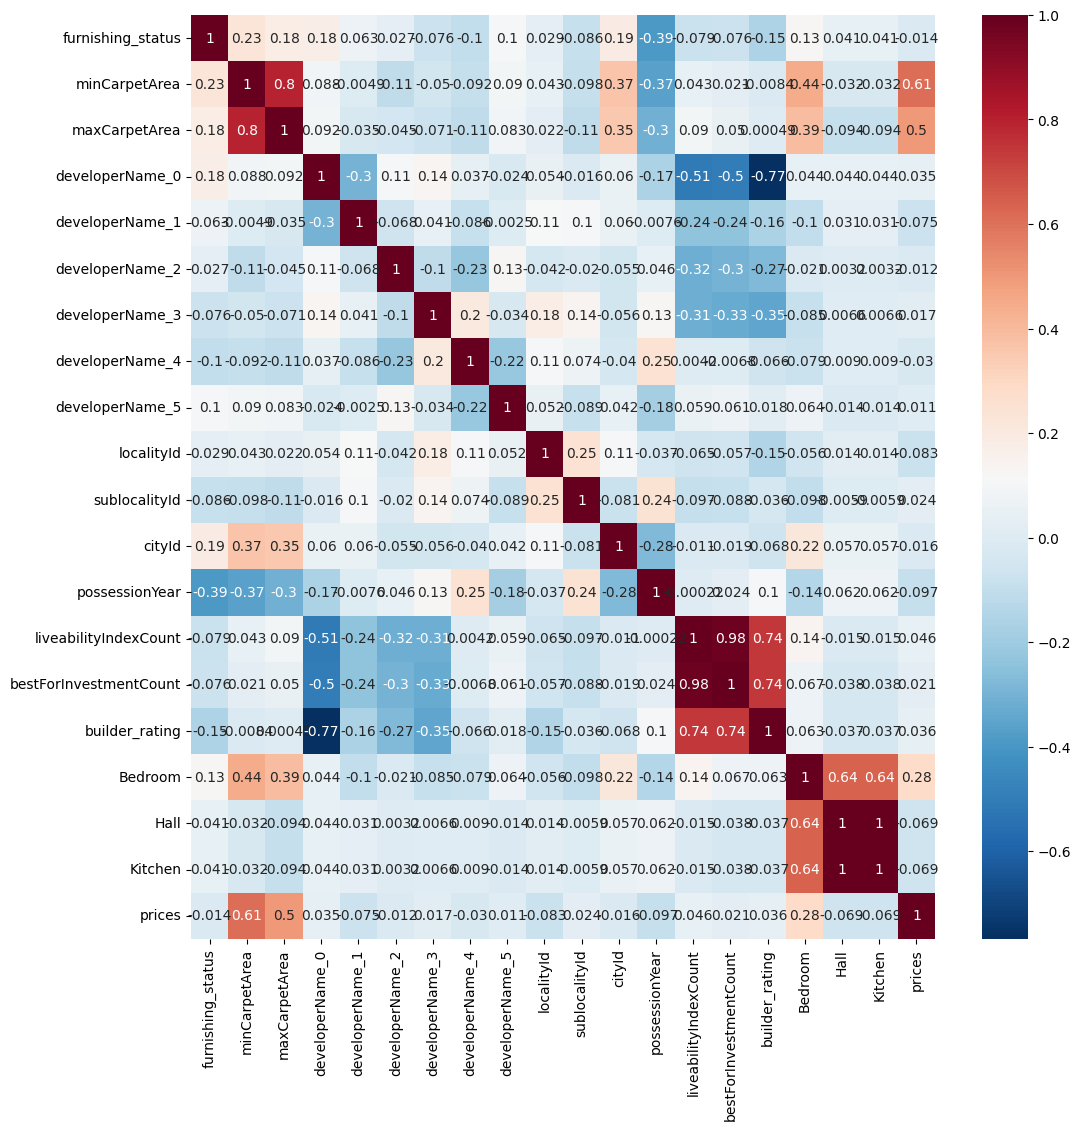

In [20]:
fig, ax = plt.subplots(figsize=(12,12))  
sb.heatmap(df.corr(), 
            cmap='RdBu_r',
            annot=True)

since high correlation hence dropping 

In [21]:
df = df.drop(['liveabilityIndexCount','Kitchen'], axis = 1)

In [22]:
df.head(10)

,furnishing_status,minCarpetArea,maxCarpetArea,possessionStatus,developerName_0,developerName_1,developerName_2,developerName_3,developerName_4,developerName_5,...,localityId,sublocalityId,cityId,possessionYear,propertyType,bestForInvestmentCount,builder_rating,Bedroom,Hall,prices
0,0,471,2342,Under Construction,0,0,0,0,0,1,...,474,882,1,2022.0,appartment,10,5.0,2.5,1,12300000
1,0,304,1707,Ready Possession,0,0,0,0,0,1,...,35,1457,1,NaN,appartment,10,5.0,2.5,1,4750000
2,0,701,1092,Ready Possession,0,0,0,0,0,1,...,474,882,1,NaN,appartment,9,5.0,2.5,1,16600000
4,0,316,413,Under Construction,0,0,0,0,0,1,...,474,884,1,2024.0,commercial_office,9,5.0,0.0,0,9400000
6,0,566,784,Under Construction,0,0,0,0,0,1,...,42,1563,1,2026.0,appartment,10,5.0,2.5,1,21000000
7,0,2200,3668,Ready Possession,0,0,0,0,0,1,...,474,1587,1,NaN,appartment,9,5.0,4.5,1,58600000
8,0,253,253,Ready Possession,0,0,0,0,0,1,...,35,1457,1,NaN,commercial_office,9,5.0,0.0,0,11299999
9,0,316,316,Ready Possession,0,0,0,0,0,1,...,474,1465,1,2019.0,commercial_office,9,5.0,0.0,0,9711000
10,0,316,323,Under Construction,0,0,0,0,0,1,...,474,884,1,2024.0,commercial_office,9,5.0,0.0,0,11600000
11,0,263,1764,Under Construction,0,0,0,0,0,1,...,474,882,1,2023.0,appartment,10,5.0,2.5,1,5630000


#### Property Type

In [23]:
df['propertyType'].unique()

array(['appartment', 'commercial_office'], dtype=object)

In [24]:
from sklearn.preprocessing import LabelEncoder
gle = LabelEncoder()
df['propertyType'] = gle.fit_transform(df['propertyType'])
df.head(10)

,furnishing_status,minCarpetArea,maxCarpetArea,possessionStatus,developerName_0,developerName_1,developerName_2,developerName_3,developerName_4,developerName_5,...,localityId,sublocalityId,cityId,possessionYear,propertyType,bestForInvestmentCount,builder_rating,Bedroom,Hall,prices
0,0,471,2342,Under Construction,0,0,0,0,0,1,...,474,882,1,2022.0,0,10,5.0,2.5,1,12300000
1,0,304,1707,Ready Possession,0,0,0,0,0,1,...,35,1457,1,NaN,0,10,5.0,2.5,1,4750000
2,0,701,1092,Ready Possession,0,0,0,0,0,1,...,474,882,1,NaN,0,9,5.0,2.5,1,16600000
4,0,316,413,Under Construction,0,0,0,0,0,1,...,474,884,1,2024.0,1,9,5.0,0.0,0,9400000
6,0,566,784,Under Construction,0,0,0,0,0,1,...,42,1563,1,2026.0,0,10,5.0,2.5,1,21000000
7,0,2200,3668,Ready Possession,0,0,0,0,0,1,...,474,1587,1,NaN,0,9,5.0,4.5,1,58600000
8,0,253,253,Ready Possession,0,0,0,0,0,1,...,35,1457,1,NaN,1,9,5.0,0.0,0,11299999
9,0,316,316,Ready Possession,0,0,0,0,0,1,...,474,1465,1,2019.0,1,9,5.0,0.0,0,9711000
10,0,316,323,Under Construction,0,0,0,0,0,1,...,474,884,1,2024.0,1,9,5.0,0.0,0,11600000
11,0,263,1764,Under Construction,0,0,0,0,0,1,...,474,882,1,2023.0,0,10,5.0,2.5,1,5630000


#### possessionStatus

In [25]:
df['possessionStatus'].unique()

array(['Under Construction', 'Ready Possession'], dtype=object)

In [26]:
df['possessionStatus'] = gle.fit_transform(df['possessionStatus'])
df.head(10)

,furnishing_status,minCarpetArea,maxCarpetArea,possessionStatus,developerName_0,developerName_1,developerName_2,developerName_3,developerName_4,developerName_5,...,localityId,sublocalityId,cityId,possessionYear,propertyType,bestForInvestmentCount,builder_rating,Bedroom,Hall,prices
0,0,471,2342,1,0,0,0,0,0,1,...,474,882,1,2022.0,0,10,5.0,2.5,1,12300000
1,0,304,1707,0,0,0,0,0,0,1,...,35,1457,1,NaN,0,10,5.0,2.5,1,4750000
2,0,701,1092,0,0,0,0,0,0,1,...,474,882,1,NaN,0,9,5.0,2.5,1,16600000
4,0,316,413,1,0,0,0,0,0,1,...,474,884,1,2024.0,1,9,5.0,0.0,0,9400000
6,0,566,784,1,0,0,0,0,0,1,...,42,1563,1,2026.0,0,10,5.0,2.5,1,21000000
7,0,2200,3668,0,0,0,0,0,0,1,...,474,1587,1,NaN,0,9,5.0,4.5,1,58600000
8,0,253,253,0,0,0,0,0,0,1,...,35,1457,1,NaN,1,9,5.0,0.0,0,11299999
9,0,316,316,0,0,0,0,0,0,1,...,474,1465,1,2019.0,1,9,5.0,0.0,0,9711000
10,0,316,323,1,0,0,0,0,0,1,...,474,884,1,2024.0,1,9,5.0,0.0,0,11600000
11,0,263,1764,1,0,0,0,0,0,1,...,474,882,1,2023.0,0,10,5.0,2.5,1,5630000


#### propetyBuyOrRent

In [27]:
df['propetyBuyOrRent'].unique()

array(['buy'], dtype=object)

In [28]:
df = df.drop(['propetyBuyOrRent'], axis = 1)

In [29]:
df['possessionYear'].value_counts()

2025.0    123
2023.0    123
2024.0    112
2026.0     77
2019.0     49
2021.0     43
2022.0     42
2016.0     38
2020.0     35
2015.0     32
2018.0     32
2017.0     24
2027.0     20
2014.0     14
2012.0      8
2028.0      7
2010.0      5
2013.0      4
2011.0      2
2029.0      2
2009.0      1
2005.0      1
2031.0      1
Name: possessionYear, dtype: int64

#### Possession year

In [30]:
df.isna().sum()

furnishing_status           0
minCarpetArea               0
maxCarpetArea               0
possessionStatus            0
developerName_0             0
developerName_1             0
developerName_2             0
developerName_3             0
developerName_4             0
developerName_5             0
localityId                  0
sublocalityId               0
cityId                      0
possessionYear            100
propertyType                0
bestForInvestmentCount      0
builder_rating              0
Bedroom                     0
Hall                        0
prices                      0
dtype: int64

In [31]:
# Filling the rows with the most frequent year 
df=df.apply(lambda x: x.fillna(x.value_counts().index[0]))
df['possessionYear'].isna().sum()

0

In [32]:
df.head(10)

,furnishing_status,minCarpetArea,maxCarpetArea,possessionStatus,developerName_0,developerName_1,developerName_2,developerName_3,developerName_4,developerName_5,localityId,sublocalityId,cityId,possessionYear,propertyType,bestForInvestmentCount,builder_rating,Bedroom,Hall,prices
0,0,471,2342,1,0,0,0,0,0,1,474,882,1,2022.0,0,10,5.0,2.5,1,12300000
1,0,304,1707,0,0,0,0,0,0,1,35,1457,1,2025.0,0,10,5.0,2.5,1,4750000
2,0,701,1092,0,0,0,0,0,0,1,474,882,1,2025.0,0,9,5.0,2.5,1,16600000
4,0,316,413,1,0,0,0,0,0,1,474,884,1,2024.0,1,9,5.0,0.0,0,9400000
6,0,566,784,1,0,0,0,0,0,1,42,1563,1,2026.0,0,10,5.0,2.5,1,21000000
7,0,2200,3668,0,0,0,0,0,0,1,474,1587,1,2025.0,0,9,5.0,4.5,1,58600000
8,0,253,253,0,0,0,0,0,0,1,35,1457,1,2025.0,1,9,5.0,0.0,0,11299999
9,0,316,316,0,0,0,0,0,0,1,474,1465,1,2019.0,1,9,5.0,0.0,0,9711000
10,0,316,323,1,0,0,0,0,0,1,474,884,1,2024.0,1,9,5.0,0.0,0,11600000
11,0,263,1764,1,0,0,0,0,0,1,474,882,1,2023.0,0,10,5.0,2.5,1,5630000


In [33]:
X = df.drop(['localityId','sublocalityId'], axis=1)

In [34]:
df1=df.copy()

In [35]:
X=df.iloc[:,1:-1].values
y=df.iloc[:,-1].values.reshape(-1,1)

In [36]:
X

array([[4.710e+02, 2.342e+03, 1.000e+00, ..., 5.000e+00, 2.500e+00,
        1.000e+00],
       [3.040e+02, 1.707e+03, 0.000e+00, ..., 5.000e+00, 2.500e+00,
        1.000e+00],
       [7.010e+02, 1.092e+03, 0.000e+00, ..., 5.000e+00, 2.500e+00,
        1.000e+00],
       ...,
       [6.290e+02, 2.440e+03, 0.000e+00, ..., 4.000e+00, 3.000e+00,
        1.000e+00],
       [2.826e+03, 3.857e+03, 0.000e+00, ..., 4.000e+00, 3.500e+00,
        1.000e+00],
       [9.550e+02, 1.468e+03, 0.000e+00, ..., 4.000e+00, 2.500e+00,
        1.000e+00]])

In [37]:
y

array([[ 12300000],
       [  4750000],
       [ 16600000],
       [  9400000],
       [ 21000000],
       [ 58600000],
       [ 11299999],
       [  9711000],
       [ 11600000],
       [  5630000],
       [ 17600000],
       [ 30800000],
       [ 13100000],
       [ 12700000],
       [ 20000000],
       [ 33200000],
       [  5630000],
       [ 34100000],
       [ 22599999],
       [ 12000000],
       [ 11299999],
       [ 14900000],
       [ 14800000],
       [  9078000],
       [  6800000],
       [  8950000],
       [ 11800000],
       [ 28300000],
       [ 12700000],
       [ 29700000],
       [ 11600000],
       [ 14500000],
       [  5183000],
       [ 12000000],
       [ 11200000],
       [ 12700000],
       [  6884999],
       [ 13899999],
       [  5800000],
       [  6931999],
       [  6729000],
       [ 26900000],
       [ 10300000],
       [ 33600000],
       [ 15500000],
       [ 30000000],
       [ 10400000],
       [ 25000000],
       [  9499000],
       [  7120999],


##SelectKBest

In [38]:
from sklearn.feature_selection import SelectKBest, f_regression

# X is the input features and y is the target variable
selector = SelectKBest(score_func=f_regression, k=5) # Select the top 5 features
X_new = selector.fit_transform(X, y)

# Print the selected feature indices
print(selector.get_support(indices=True))

[ 0  1  2 12 16]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##Recursive Feature Elimination

In [39]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# X is the input features and y is the target variable
estimator = LinearRegression() # Use linear regression as the estimator
selector = RFE(estimator, n_features_to_select=5, step=1) # Select the top 5 features
selector = selector.fit(X, y)

# Print the selected feature indices
print(selector.get_support(indices=True))

[ 3  6 13 16 17]


In [40]:
df_1=df.copy()

In [41]:
df_1 = df_1.drop(['possessionStatus','developerName_0','developerName_1','developerName_2','developerName_3','developerName_4','developerName_5','localityId','sublocalityId','possessionYear','propertyType','bestForInvestmentCount','Bedroom','Hall'], axis = 1)

In [42]:
df_1

,furnishing_status,minCarpetArea,maxCarpetArea,cityId,builder_rating,prices
0,0,471,2342,1,5.0,12300000
1,0,304,1707,1,5.0,4750000
2,0,701,1092,1,5.0,16600000
4,0,316,413,1,5.0,9400000
6,0,566,784,1,5.0,21000000
...,...,...,...,...,...,...
995,0,570,797,3,4.0,2600000
996,0,1200,1500,3,4.0,2520000
997,0,629,2440,2,4.0,5000000
998,1,2826,3857,3,4.0,14800000


In [43]:
X=df_1.iloc[:,:-1].values
y=df_1.iloc[:,-1].values.reshape(-1,1)

In [ ]:
# X

In [ ]:
# X=df.iloc[:,:-1].values
# y=df.iloc[:,-1].values.reshape(-1,1)

In [44]:
X

array([[0.000e+00, 4.710e+02, 2.342e+03, 1.000e+00, 5.000e+00],
       [0.000e+00, 3.040e+02, 1.707e+03, 1.000e+00, 5.000e+00],
       [0.000e+00, 7.010e+02, 1.092e+03, 1.000e+00, 5.000e+00],
       ...,
       [0.000e+00, 6.290e+02, 2.440e+03, 2.000e+00, 4.000e+00],
       [1.000e+00, 2.826e+03, 3.857e+03, 3.000e+00, 4.000e+00],
       [0.000e+00, 9.550e+02, 1.468e+03, 3.000e+00, 4.000e+00]])

In [45]:
X1=df[['minCarpetArea']]
y1=df['prices']

In [46]:
X1

,minCarpetArea
0,471
1,304
2,701
4,316
6,566
...,...
995,570
996,1200
997,629
998,2826


In [47]:
y1

0      12300000
1       4750000
2      16600000
4       9400000
6      21000000
         ...   
995     2600000
996     2520000
997     5000000
998    14800000
999    12700000
Name: prices, Length: 895, dtype: int64

In [48]:
X2=df[['maxCarpetArea']]
y2=df['prices']

In [49]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Scale the target values
y = scaler.fit_transform(y)

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [91]:
X_train

array([[ 0.  , -0.53, -0.45,  1.  ,  5.  ],
       [ 0.  ,  0.34,  1.34,  2.  ,  5.  ],
       [ 0.  , -0.41, -0.09,  1.  ,  5.  ],
       ...,
       [ 0.  , -0.66, -0.55,  1.  ,  4.5 ],
       [ 0.  , -0.56, -0.78,  1.  ,  5.  ],
       [ 0.  , -0.28, -0.34,  1.  ,  4.5 ]])

In [92]:
y_train

array([[-4.93e-01],
       [-4.42e-01],
       [-3.28e-01],
       [ 2.96e-02],
       [-4.78e-01],
       [-4.07e-01],
       [-1.34e-01],
       [-3.00e-01],
       [-2.51e-01],
       [-2.38e-01],
       [-1.15e-01],
       [-4.54e-01],
       [-2.85e-01],
       [-4.51e-01],
       [ 1.13e-01],
       [-2.69e-01],
       [-4.84e-01],
       [ 6.74e-01],
       [ 3.25e-01],
       [-1.58e-01],
       [-4.07e-01],
       [ 3.01e-01],
       [-3.65e-01],
       [-2.69e-01],
       [-4.23e-01],
       [ 1.82e+00],
       [ 3.04e-01],
       [-5.00e-01],
       [-4.10e-01],
       [-3.25e-01],
       [ 8.42e+00],
       [ 7.28e-02],
       [-2.48e-01],
       [-1.21e-01],
       [-2.23e-01],
       [-5.46e-01],
       [-3.62e-01],
       [-5.89e-01],
       [-4.26e-01],
       [-4.13e-01],
       [-1.61e-01],
       [-3.00e-01],
       [ 8.51e-02],
       [ 3.27e-02],
       [-5.08e-01],
       [ 3.93e-01],
       [-6.59e-02],
       [-5.15e-01],
       [-1.04e-02],
       [-8.13e-02],


In [51]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 1/3, random_state = 0)

In [52]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 1/3, random_state = 0)

##Feature Scaling

In [53]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train[:, 1:3]=sc.fit_transform(X_train[:,1:3])
X_test[:, 1:3]=sc.transform(X_test[:, 1:3])

# X_train[:, 13:19]=sc.fit_transform(X_train[:,13:19])
# X_test[:, 13:19]=sc.transform(X_test[:, 13:19])

In [54]:
X_train

array([[ 0.        , -0.52909378, -0.45235351,  1.        ,  5.        ],
       [ 0.        ,  0.34200353,  1.3367332 ,  2.        ,  5.        ],
       [ 0.        , -0.40777408, -0.09482049,  1.        ,  5.        ],
       ...,
       [ 0.        , -0.6569713 , -0.55044408,  1.        ,  4.5       ],
       [ 0.        , -0.55532507, -0.78003288,  1.        ,  5.        ],
       [ 0.        , -0.28317547, -0.33862531,  1.        ,  4.5       ]])

##Linear Regression and Polynomial Linear Regression

In [55]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X1_train, y1_train)

LinearRegression()

In [56]:
y_pred = regressor.predict(X1_test)

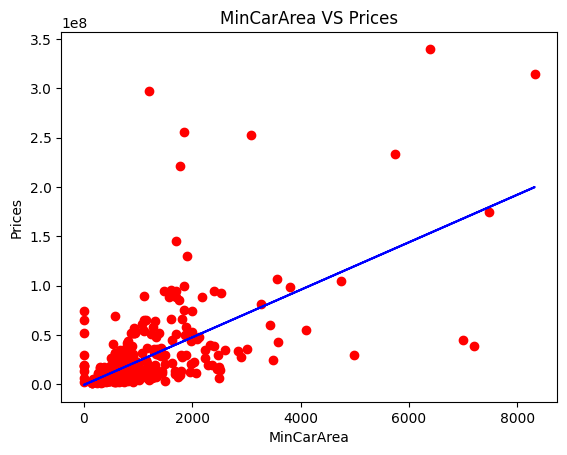

In [57]:
plt.scatter(X1_train, y1_train, color = 'red')
plt.plot(X1_train, regressor.predict(X1_train), color = 'blue')
plt.title('MinCarArea VS Prices')
plt.xlabel('MinCarArea')
plt.ylabel('Prices')
plt.show()

In [58]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X1)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y1)

LinearRegression()

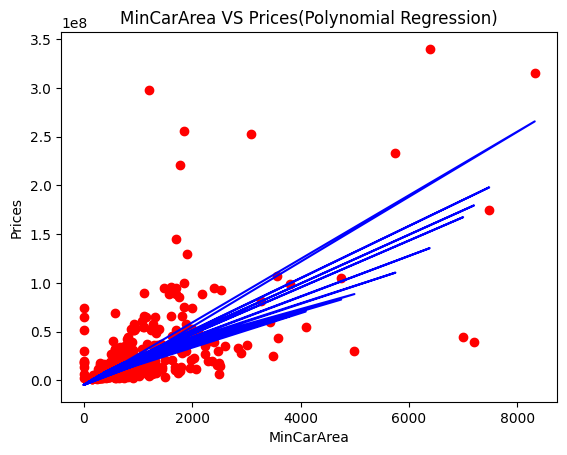

In [59]:
plt.scatter(X1_train, y1_train, color = 'red')
plt.plot(X1_train, lin_reg_2.predict(poly_reg.fit_transform(X1_train)), color = 'blue')
plt.title('MinCarArea VS Prices(Polynomial Regression)')
plt.xlabel('MinCarArea')
plt.ylabel('Prices')
plt.show()

In [60]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X2_train, y2_train)

LinearRegression()

In [61]:
y_pred = regressor.predict(X2_test)

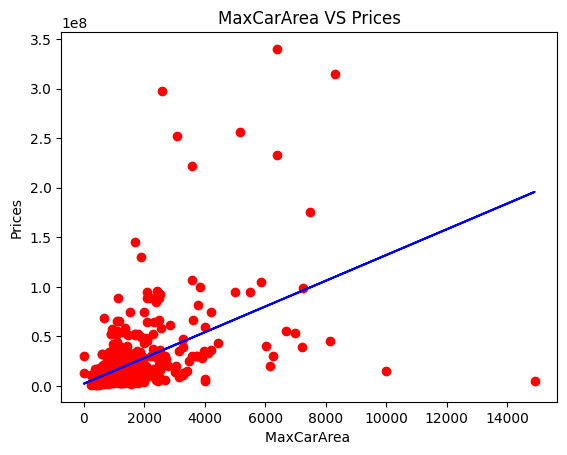

In [62]:
plt.scatter(X2_train, y2_train, color = 'red')
plt.plot(X2_train, regressor.predict(X2_train), color = 'blue')
plt.title('MaxCarArea VS Prices')
plt.xlabel('MaxCarArea ')
plt.ylabel('Prices')
plt.show()

In [63]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X2)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y2)

LinearRegression()

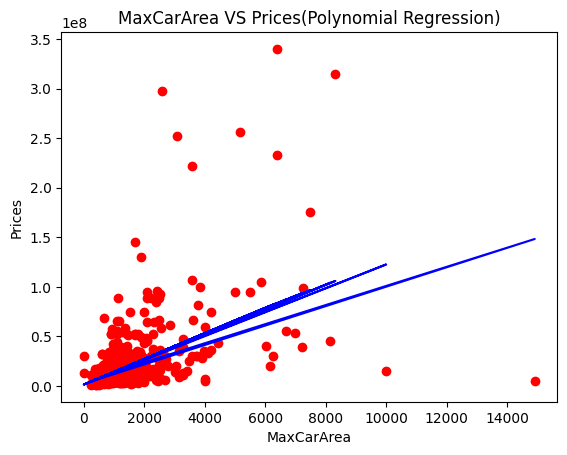

In [64]:
plt.scatter(X2_train, y2_train, color = 'red')
plt.plot(X2_train, lin_reg_2.predict(poly_reg.fit_transform(X2_train)), color = 'blue')
plt.title('MaxCarArea VS Prices(Polynomial Regression)')
plt.xlabel('MaxCarArea')
plt.ylabel('Prices')
plt.show()

##MLR


In [65]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [66]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 6.29e-01  4.95e-01]
 [-9.47e-02  4.99e-03]
 [ 1.43e+00 -1.80e-01]
 [-8.07e-02 -1.77e-01]
 [-3.08e-01 -3.48e-01]
 [-1.35e-01 -2.32e-01]
 [ 2.20e-01 -2.48e-01]
 [ 7.57e-01  1.93e+00]
 [ 1.60e-01 -3.77e-01]
 [-4.08e-01 -3.92e-01]
 [-1.67e-01 -4.29e-01]
 [-7.87e-02  2.14e-01]
 [-1.60e-01 -1.68e-01]
 [-4.44e-01 -5.16e-01]
 [ 5.72e-01  1.43e+00]
 [ 2.84e-03 -7.33e-03]
 [-3.12e-01 -2.11e-01]
 [ 1.53e-01 -5.46e-01]
 [-3.98e-01 -5.41e-01]
 [ 1.61e-01  4.24e-01]
 [ 4.23e-01 -2.27e-02]
 [ 1.64e-01 -1.58e-01]
 [-4.01e-01 -4.81e-01]
 [ 6.47e-02 -8.13e-02]
 [-1.19e-01 -1.09e-01]
 [-1.23e-01 -3.62e-01]
 [-2.65e-01 -2.05e-01]
 [ 6.92e-02  1.37e-01]
 [-2.91e-01 -4.39e-01]
 [-7.87e-02  4.99e-03]
 [-4.51e-01 -4.82e-01]
 [-6.14e-01 -2.69e-01]
 [-4.93e-01 -5.62e-01]
 [-4.20e-01 -5.03e-01]
 [ 7.38e-02  4.39e-01]
 [-3.59e-01 -4.94e-01]
 [-1.75e-01 -3.82e-01]
 [-2.95e-01 -4.70e-01]
 [-6.43e-02  6.66e-02]
 [-4.27e-02  2.35e-02]
 [ 1.73e+00 -2.08e-01]
 [ 7.14e-01  2.30e+00]
 [-2.40e-01 -2.35e-01]
 [-2.16e-01

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)

# calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# calculate R-squared
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 0.3402454495134824
Mean Squared Error: 0.3291307772697008
R-squared: 0.2295885599352543


##SVR

In [68]:
from sklearn.svm import SVR
svr_regressor = SVR(kernel = 'rbf')
svr_regressor.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [69]:
y_pred = svr_regressor.predict(X)

In [70]:
residuals = y_test - y_pred
print("Residuals:", residuals)

Residuals: [[ 0.73  0.82  0.76 ...  0.71  0.17  0.65]
 [ 0.24  0.33  0.27 ...  0.22 -0.32  0.16]
 [ 0.05  0.14  0.09 ...  0.03 -0.51 -0.02]
 ...
 [ 0.24  0.33  0.27 ...  0.22 -0.32  0.16]
 [-0.16 -0.08 -0.13 ... -0.19 -0.72 -0.24]
 [-0.11 -0.02 -0.08 ... -0.13 -0.67 -0.19]]


In [71]:
y_pred = svr_regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[-4.59e-01  4.95e-01]
 [-4.59e-01  4.99e-03]
 [-4.60e-01 -1.80e-01]
 [-4.59e-01 -1.77e-01]
 [-4.59e-01 -3.48e-01]
 [-4.59e-01 -2.32e-01]
 [-4.59e-01 -2.48e-01]
 [-4.59e-01  1.93e+00]
 [-4.59e-01 -3.77e-01]
 [-4.59e-01 -3.92e-01]
 [-4.59e-01 -4.29e-01]
 [-4.59e-01  2.14e-01]
 [-4.59e-01 -1.68e-01]
 [-4.60e-01 -5.16e-01]
 [-4.59e-01  1.43e+00]
 [-4.59e-01 -7.33e-03]
 [-4.59e-01 -2.11e-01]
 [-4.59e-01 -5.46e-01]
 [-4.59e-01 -5.41e-01]
 [-4.59e-01  4.24e-01]
 [-4.59e-01 -2.27e-02]
 [-4.60e-01 -1.58e-01]
 [-4.59e-01 -4.81e-01]
 [-4.59e-01 -8.13e-02]
 [-4.59e-01 -1.09e-01]
 [-4.59e-01 -3.62e-01]
 [-4.59e-01 -2.05e-01]
 [-4.59e-01  1.37e-01]
 [-4.59e-01 -4.39e-01]
 [-4.59e-01  4.99e-03]
 [-4.59e-01 -4.82e-01]
 [-4.59e-01 -2.69e-01]
 [-4.60e-01 -5.62e-01]
 [-4.59e-01 -5.03e-01]
 [-4.59e-01  4.39e-01]
 [-4.59e-01 -4.94e-01]
 [-4.59e-01 -3.82e-01]
 [-4.59e-01 -4.70e-01]
 [-4.59e-01  6.66e-02]
 [-4.59e-01  2.35e-02]
 [-4.60e-01 -2.08e-01]
 [-4.59e-01  2.30e+00]
 [-4.59e-01 -2.35e-01]
 [-4.59e-01

In [72]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)

# calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# calculate R-squared
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 0.4173125335193958
Mean Squared Error: 0.5868913685173281
R-squared: -0.37376342659835493


##Decision Tree

In [73]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state = 0)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [74]:
y_pred = dt_regressor.predict(X)

In [75]:
residuals = y_test - y_pred
print("Residuals:", residuals)

Residuals: [[-7.92 -7.92 -7.92 ... -7.92 -8.59 -8.59]
 [-8.41 -8.41 -8.41 ... -8.41 -9.08 -9.08]
 [-8.6  -8.6  -8.6  ... -8.6  -9.26 -9.26]
 ...
 [-8.41 -8.41 -8.41 ... -8.41 -9.08 -9.08]
 [-8.81 -8.81 -8.81 ... -8.81 -9.48 -9.48]
 [-8.76 -8.76 -8.76 ... -8.76 -9.43 -9.43]]


In [76]:
y_pred1 = dt_regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred1.reshape(len(y_pred1),1), y_test.reshape(len(y_test),1)),1))

[[-8.13e-02  4.95e-01]
 [ 4.42e-01  4.99e-03]
 [ 2.30e+00 -1.80e-01]
 [-2.05e-01 -1.77e-01]
 [-4.37e-01 -3.48e-01]
 [-2.32e-01 -2.32e-01]
 [-2.97e-01 -2.48e-01]
 [ 9.54e-01  1.93e+00]
 [-2.60e-01 -3.77e-01]
 [-3.92e-01 -3.92e-01]
 [-3.46e-01 -4.29e-01]
 [-2.32e-01  2.14e-01]
 [-1.92e-01 -1.68e-01]
 [-5.00e-01 -5.16e-01]
 [-7.33e-03  1.43e+00]
 [-1.21e-01 -7.33e-03]
 [-2.88e-01 -2.11e-01]
 [-4.24e-01 -5.46e-01]
 [-4.82e-01 -5.41e-01]
 [ 2.64e-01  4.24e-01]
 [-3.70e-01 -2.27e-02]
 [-4.33e-01 -1.58e-01]
 [-5.53e-01 -4.81e-01]
 [-4.33e-01 -8.13e-02]
 [-4.88e-01 -1.09e-01]
 [-5.37e-01 -3.62e-01]
 [-5.12e-01 -2.05e-01]
 [ 5.97e-01  1.37e-01]
 [-4.51e-01 -4.39e-01]
 [-3.28e-01  4.99e-03]
 [-4.50e-01 -4.82e-01]
 [-8.13e-02 -2.69e-01]
 [-5.34e-01 -5.62e-01]
 [-4.85e-01 -5.03e-01]
 [-2.94e-01  4.39e-01]
 [-3.54e-01 -4.94e-01]
 [-3.84e-01 -3.82e-01]
 [-2.60e-01 -4.70e-01]
 [ 2.04e-02  6.66e-02]
 [ 2.35e-02  2.35e-02]
 [ 2.60e+00 -2.08e-01]
 [ 7.69e-01  2.30e+00]
 [-4.66e-01 -2.35e-01]
 [-3.92e-01

In [77]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred1)

# calculate mean squared error
mse = mean_squared_error(y_test, y_pred1)

# calculate R-squared
r2 = r2_score(y_test, y_pred1)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 0.393896444150227
Mean Squared Error: 1.1121190664454652
R-squared: -1.6031878835859512


##Random Forest

In [78]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
rf_regressor.fit(X_train, y_train)

<ipython-input-78-946cd212942c>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train, y_train)


RandomForestRegressor(n_estimators=10, random_state=0)

In [79]:
y_pred = regressor.predict(X)

In [80]:
y_pred2 = rf_regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred2.reshape(len(y_pred2),1), y_test.reshape(len(y_test),1)),1))

[[-1.82e-01  4.95e-01]
 [-5.59e-02  4.99e-03]
 [ 3.92e+00 -1.80e-01]
 [-2.91e-01 -1.77e-01]
 [-3.89e-01 -3.48e-01]
 [-2.72e-01 -2.32e-01]
 [-3.87e-01 -2.48e-01]
 [ 2.49e+00  1.93e+00]
 [-3.39e-01 -3.77e-01]
 [-4.02e-01 -3.92e-01]
 [ 1.00e+00 -4.29e-01]
 [-1.81e-01  2.14e-01]
 [-1.84e-01 -1.68e-01]
 [-4.73e-01 -5.16e-01]
 [ 1.64e-01  1.43e+00]
 [ 3.18e-01 -7.33e-03]
 [-4.26e-01 -2.11e-01]
 [-3.93e-01 -5.46e-01]
 [-4.97e-01 -5.41e-01]
 [ 2.29e-01  4.24e-01]
 [-1.88e-01 -2.27e-02]
 [-3.96e-01 -1.58e-01]
 [-3.76e-01 -4.81e-01]
 [-4.19e-01 -8.13e-02]
 [-1.50e-01 -1.09e-01]
 [-4.94e-01 -3.62e-01]
 [-4.23e-01 -2.05e-01]
 [ 7.60e-01  1.37e-01]
 [-4.79e-01 -4.39e-01]
 [-2.54e-01  4.99e-03]
 [-4.14e-01 -4.82e-01]
 [-2.48e-01 -2.69e-01]
 [-5.29e-01 -5.62e-01]
 [-4.98e-01 -5.03e-01]
 [ 6.69e-02  4.39e-01]
 [-4.14e-01 -4.94e-01]
 [-3.99e-01 -3.82e-01]
 [-4.75e-01 -4.70e-01]
 [-1.17e-03  6.66e-02]
 [ 1.76e-02  2.35e-02]
 [ 1.27e+00 -2.08e-01]
 [ 1.24e+00  2.30e+00]
 [-2.60e-01 -2.35e-01]
 [-3.86e-01

In [81]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred2)

# calculate mean squared error
mse = mean_squared_error(y_test, y_pred2)

# calculate R-squared
r2 = r2_score(y_test, y_pred2)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 0.2657930064107407
Mean Squared Error: 0.3610693030087761
R-squared: 0.15482859426962126


## ANN

In [94]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

## Initailizing the neural network


In [96]:
ann = tf.keras.models.Sequential()

## Adding first input and hidden layer

In [97]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

## Adding the second hidden layer

In [98]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

## Adding the output layer

In [99]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Compling the ANN

In [100]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [101]:
ann.fit(X_train, y_train, epochs=100, batch_size=1)

Epoch 1/100
716/716 [==============================] - 2s 1ms/step - loss: 0.1286 - accuracy: 0.0000e+00
Epoch 2/100
716/716 [==============================] - 1s 1ms/step - loss: -0.7719 - accuracy: 0.0000e+00
Epoch 3/100
716/716 [==============================] - 1s 1ms/step - loss: -1.9698 - accuracy: 0.0000e+00
Epoch 4/100
716/716 [==============================] - 1s 1ms/step - loss: -4.3360 - accuracy: 0.0000e+00
Epoch 5/100
716/716 [==============================] - 1s 1ms/step - loss: -8.8535 - accuracy: 0.0000e+00
Epoch 6/100
716/716 [==============================] - 1s 1ms/step - loss: -16.3843 - accuracy: 0.0000e+00
Epoch 7/100
716/716 [==============================] - 1s 1ms/step - loss: -27.2783 - accuracy: 0.0000e+00
Epoch 8/100
716/716 [==============================] - 1s 2ms/step - loss: -42.7739 - accuracy: 0.0000e+00
Epoch 9/100
716/716 [==============================] - 1s 2ms/step - loss: -63.2396 - accuracy: 0.0000e+00
Epoch 10/100
716/716 [=====================

In [103]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 50)

Epoch 1/50
23/23 [==============================] - 0s 5ms/step - loss: -110194.1562 - accuracy: 0.0000e+00
Epoch 2/50
23/23 [==============================] - 0s 5ms/step - loss: -110417.2969 - accuracy: 0.0000e+00
Epoch 3/50
23/23 [==============================] - 0s 5ms/step - loss: -110651.0078 - accuracy: 0.0000e+00
Epoch 4/50
23/23 [==============================] - 0s 6ms/step - loss: -110885.1719 - accuracy: 0.0000e+00
Epoch 5/50
23/23 [==============================] - 0s 5ms/step - loss: -111104.0859 - accuracy: 0.0000e+00
Epoch 6/50
23/23 [==============================] - 0s 5ms/step - loss: -111335.6953 - accuracy: 0.0000e+00
Epoch 7/50
23/23 [==============================] - 0s 4ms/step - loss: -111566.6953 - accuracy: 0.0000e+00
Epoch 8/50
23/23 [==============================] - 0s 4ms/step - loss: -111798.3906 - accuracy: 0.0000e+00
Epoch 9/50
23/23 [==============================] - 0s 5ms/step - loss: -112028.2656 - accuracy: 0.0000e+00
Epoch 10/50
23/23 [=========

In [104]:
print(y_pred)

[[5.34e+02]
 [3.60e+02]
 [6.03e+02]
 [2.66e+02]
 [4.79e+02]
 [1.91e+03]
 [2.07e+02]
 [2.58e+02]
 [2.59e+02]
 [3.35e+02]
 [1.39e+03]
 [1.08e+03]
 [4.89e+02]
 [3.42e+02]
 [6.52e+02]
 [1.06e+03]
 [2.26e+02]
 [1.02e+03]
 [6.20e+02]
 [9.08e+02]
 [1.24e+03]
 [1.09e+03]
 [3.10e+02]
 [1.56e+03]
 [8.33e+02]
 [3.41e+02]
 [3.21e+02]
 [6.22e+02]
 [3.09e+02]
 [6.34e+02]
 [3.42e+02]
 [5.73e+02]
 [6.18e+02]
 [1.24e+03]
 [9.18e+02]
 [1.62e+03]
 [6.85e+02]
 [1.05e+03]
 [4.34e+02]
 [1.08e+03]
 [7.19e+02]
 [1.87e+03]
 [8.72e+02]
 [2.43e+03]
 [2.00e+03]
 [2.45e+03]
 [7.29e+02]
 [2.85e+03]
 [1.09e+03]
 [1.09e+03]
 [6.01e+02]
 [1.05e+03]
 [2.14e+03]
 [9.01e+02]
 [7.14e+02]
 [1.34e+03]
 [1.48e+03]
 [4.12e+02]
 [3.90e+02]
 [4.52e+02]
 [3.14e+02]
 [5.70e+02]
 [4.07e+02]
 [1.21e+03]
 [1.36e+03]
 [9.18e+01]
 [6.38e+02]
 [3.74e+02]
 [3.50e+03]
 [2.09e+03]
 [1.04e+03]
 [2.23e+03]
 [2.44e+03]
 [6.30e+02]
 [6.89e+02]
 [6.29e+02]
 [1.60e+03]
 [3.69e+02]
 [5.95e+02]
 [5.70e+02]
 [4.52e+02]
 [5.45e+02]
 [6.06e+02]
 [3.

## Note:-
The evaluation metrics used is mse, mae and r-squared the optimal value for mae, mse should be close to zero and the optimal value for r-squared should be close to 1